In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
import pandas as pd

In [4]:
# create engine to hawaii.sqlite
Base = automap_base()
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector = inspect(engine)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database. 
columns = inspector.get_columns('measurement')
for column in columns:
    primarykeystr = ""
    if column ['primary_key']==1:
        primarykeystr = "Primary Key"
    print(column["name"],column["type"],primarykeystr)

id INTEGER Primary Key
station TEXT 
date TEXT 
prcp FLOAT 
tobs FLOAT 


In [11]:
columns = inspector.get_columns('station')
for column in columns:
    primarykeystr = ""
    if column['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(column["name"], column["type"], primarykeystr)

id INTEGER Primary Key
station TEXT 
name TEXT 
latitude FLOAT 
longitude FLOAT 
elevation FLOAT 


In [12]:
# Calculate the date one year from the last date in data set.
earliest = session.query(measurement.date).order_by(measurement.date).first()
latest= session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"Earliest: {earliest[0]} , Latest: {latest[0]}")

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date
latestdate = dt.datetime.strptime(latest[0], '%Y-%m-%d')
querydate = dt.date(latestdate.year -1, latestdate.month, latestdate.day)
querydate

sel = [measurement.date,measurement.prcp]
queryresult = session.query(*sel).filter(measurement.date >= querydate).all()

precipitation = pd.DataFrame(queryresult, columns=['Date','Precipitation'])
precipitation = precipitation.dropna(how='any') # clean up non value entries
precipitation = precipitation.sort_values(["Date"], ascending=True)
precipitation = precipitation.set_index("Date")
precipitation.head()

# Use Pandas Plotting with Matplotlib to plot the data

Earliest: 2010-01-01 , Latest: 2017-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


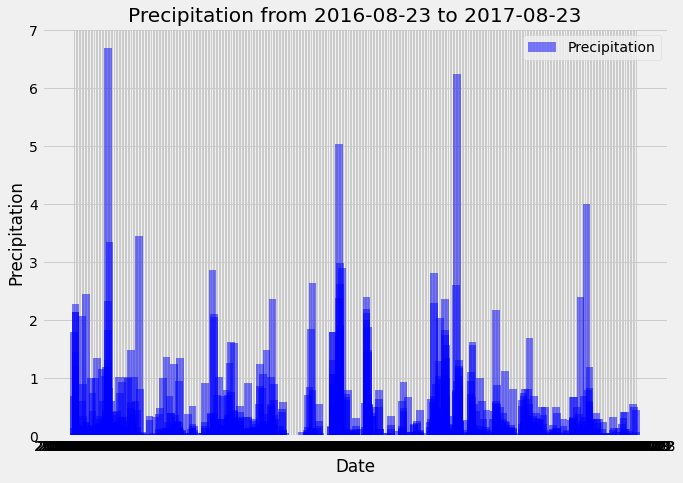

In [14]:

Date = precipitation.index.tolist()
Precipitation = precipitation['Precipitation'].tolist()

plt.figure(figsize=(10,7))
plt.bar(Date,Precipitation,width = 5 ,color='b', alpha=0.5, align="center",label='Precipitation')

plt.title(f"Precipitation from {querydate} to {latest[0]}")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations = [measurement.station,func.count(measurement.id)]
activestations = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()
activestations




[('2010-01-01', 0.15),
 ('2010-01-01', 0.08),
 ('2010-01-01', 0.28),
 ('2010-01-01', 0.15),
 ('2010-01-01', 0.14),
 ('2010-03-01', 0.01),
 ('2010-01-01', 0.05),
 ('2010-05-03', None),
 ('2010-01-01', 0.21)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stations_select = [func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
mostactive = session.query(*stations_select).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
mostactive

(54.0, 85.0, 71.66378066378067)

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query_12months = session.query(measurement.tobs).\
    filter(measurement.station == activestations[0][0]).\
    filter(measurement.date >= querydate).all()
temperatures = list(np.ravel(queryresult))

temperatures

['2016-08-23',
 0.0,
 '2016-08-24',
 0.08,
 '2016-08-25',
 0.08,
 '2016-08-26',
 0.0,
 '2016-08-27',
 0.0,
 '2016-08-28',
 0.01,
 '2016-08-29',
 0.0,
 '2016-08-30',
 0.0,
 '2016-08-31',
 0.13,
 '2016-09-01',
 0.0,
 '2016-09-02',
 0.0,
 '2016-09-03',
 0.0,
 '2016-09-04',
 0.03,
 '2016-09-05',
 None,
 '2016-09-06',
 None,
 '2016-09-07',
 0.05,
 '2016-09-08',
 0.0,
 '2016-09-09',
 0.03,
 '2016-09-10',
 0.0,
 '2016-09-11',
 0.05,
 '2016-09-12',
 0.0,
 '2016-09-13',
 0.02,
 '2016-09-14',
 1.32,
 '2016-09-15',
 0.42,
 '2016-09-16',
 0.06,
 '2016-09-17',
 0.05,
 '2016-09-18',
 0.0,
 '2016-09-19',
 0.0,
 '2016-09-20',
 0.0,
 '2016-09-21',
 0.0,
 '2016-09-22',
 0.02,
 '2016-09-23',
 0.0,
 '2016-09-24',
 0.0,
 '2016-09-25',
 0.0,
 '2016-09-26',
 0.06,
 '2016-09-27',
 0.02,
 '2016-09-28',
 0.0,
 '2016-09-29',
 0.0,
 '2016-09-30',
 0.0,
 '2016-10-01',
 0.0,
 '2016-10-02',
 0.0,
 '2016-10-03',
 0.0,
 '2016-10-04',
 0.0,
 '2016-10-05',
 0.0,
 '2016-10-06',
 0.0,
 '2016-10-07',
 0.0,
 '2016-10-08',
 

In [28]:
select = [station.station,station.name,station.latitude,station.longitude,station.elevation]
queryresult = session.query(*select).all()
stations_desc = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation'])

stations_desc

,Station,Name,Latitude,Longitude,Elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Close session

In [ ]:
# Close Session
session.close()